# **Nombre:** Yeison Fernando Villamil Franco - A01793803

# Bienvenido al notebook
# Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
import numpy as np
import pandas as pd

In [37]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
###-----------------EJEMPLO DE EIGENVALORES
# define la matriz
def func_eigen(matrix):
    
    print("-------Matriz original-------")
    print(matrix)
    print("-----------------------------")
    # calcula la eigendescomposición
    values, vectors = np.linalg.eig(matrix)
    print(values) #D
    print(vectors) #W

    #Ejemplo de reconstrucción

    W = vectors
    Winv = np.linalg.inv(W)
    D = np.diag(values)
    #la matriz B tiene que dar igual a A
    #reconstruye la matriz 
    print("-------Matriz reconstruida-------")
    # Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
    #ojo, estas multiplicando matrices, no escalares ;)
    #TU CODIGO AQUI-------------------------------------
    B = np.dot(np.dot(W, D), Winv)
    print(B.round(2))
    print("-----------------------------")

In [38]:
func_eigen(A)

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [40]:
#Matriz 1
mx_1 = np.array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
func_eigen(mx_1)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.+0.j  0.-0.j  2.-0.j]
 [ 3.-0.j  0.+0.j -2.+0.j]
 [ 0.+0.j  1.-0.j  1.+0.j]]
-----------------------------


In [41]:
#Matriz 2
mx_2 = np.array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
func_eigen(mx_2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [42]:
#Matriz 3
mx_3 = np.array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
func_eigen(mx_3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

`La reducción de dimensionalidad básicamente intenta poder tener menos componentes o características para problemas de altas dimensiones. Un ejemplo claro es cuando se tienen un problema de clasificación de probabilidad de riesgo en entidades bancarias. Esto permite poder proyectar cada valor de las características y unificar en vectores que pueden explicar la variabilidad de todas estas.`

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



# Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


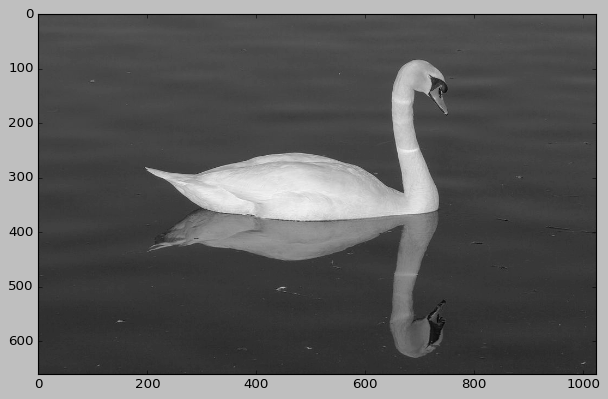

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F36351B6D10>


In [43]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [44]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [46]:
U.shape

(660, 660)

In [48]:
V.shape

(1024, 1024)

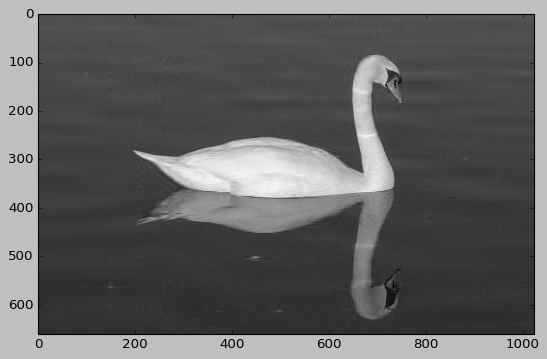

In [ ]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [59]:
def images_compress(img, nvalue=50):
    # ORIGINAL IMAGE
    # ==================================================
    print('Original Image')
    imggray = img.convert('LA')
    imgmat = np.array(list(imggray.getdata(band=0)),float)
    imgmat.shape = (imggray.size[1],imggray.size[0])
    
    plt.figure(figsize=(9,6))
    plt.imshow(imgmat,cmap='gray')
    plt.show()
    # COMPRESSED IMAGE
    # =================================================
    print('Compressed Image')
    # Singular value decomposition
    U,D,V = np.linalg.svd(imgmat)
    nvalue = 50
    recimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
    print('Matrix size in order: U, D, V and compressed image:', U.shape, D.shape, V.shape, recimg.shape)
    plt.imshow(recimg,cmap='gray')
    plt.show()

Original Image


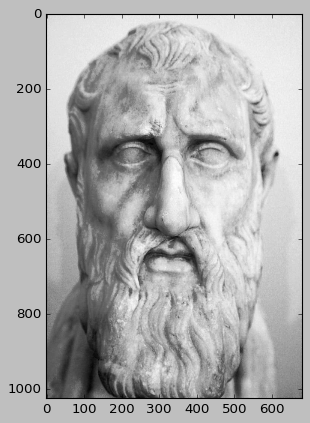

Compressed Image
Matrix size in order: U, D, V and compressed image: (1023, 1023) (682,) (682, 682) (1023, 682)


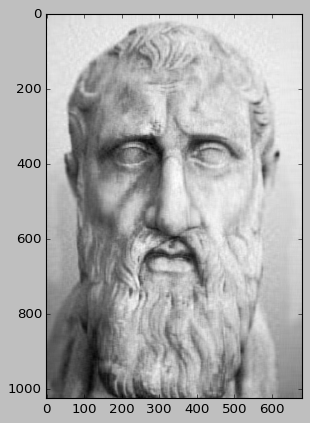

In [60]:
#imagen 1
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/10/Zenon_de_Citio.jpg'))
nvalue = 25
images_compress(img, nvalue)

Original Image


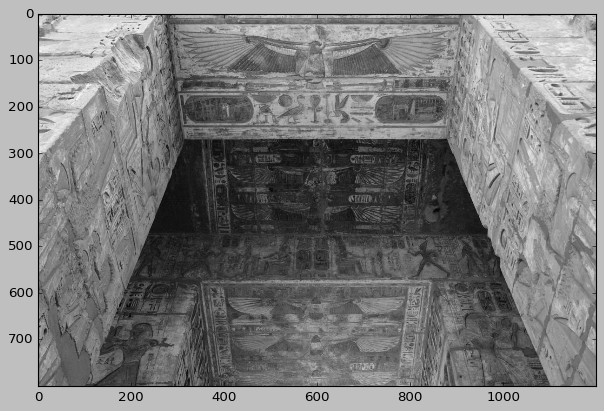

Compressed Image
Matrix size in order: U, D, V and compressed image: (800, 800) (800,) (1200, 1200) (800, 1200)


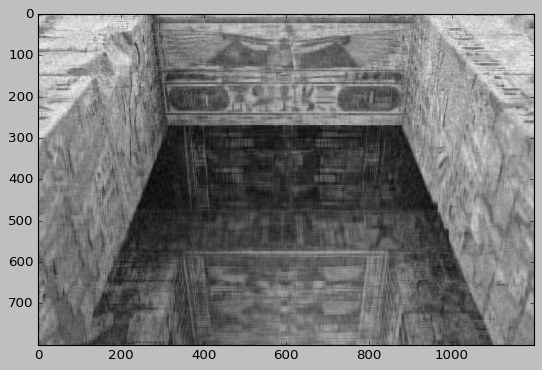

In [61]:
#imagen 2
img2 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/07/reencarnacion-egipto.jpg'))
nvalue2 = 10
images_compress(img2, nvalue2)

Original Image


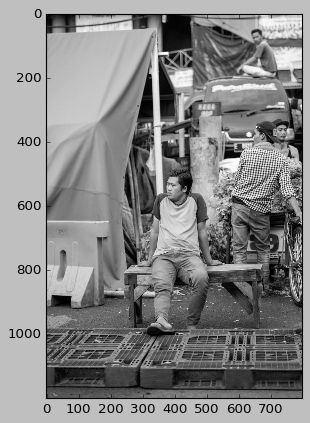

Compressed Image
Matrix size in order: U, D, V and compressed image: (1200, 1200) (800,) (800, 800) (1200, 800)


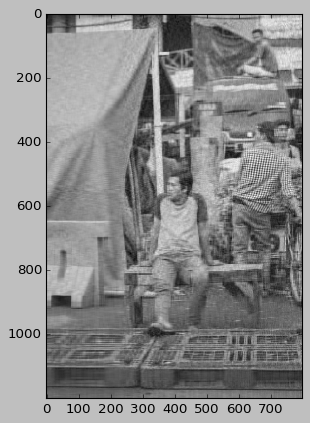

In [62]:
#imagen 3
img3 = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2022/07/desinteres-juventud.jpg'))
nvalue3 = 100
images_compress(img3, nvalue3)

`La reducción de las dimensiones en imágenes es un tema bastante interesante porque no solo permite tener una proyección de todos los pixeles de la imagen, es poder distinguir aún con menos componentes, la claridad de las imágenes. Esto permite poder tener modelos más rápidos con menos dimensiones y usar pesos de estos modelos para predecir nuevas imágenes. Claramente, lo anterior si nos referimos a temas de imágenes, pero puede ser usado para diferentes problemas con alta dimensionalidad.`

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [63]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

In [64]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [65]:
X.shape, y.shape

((150, 4), (150,))

Importante realizar en escalamiento en la reducción de dimensionalidad para que a la hora de realizar la proyección, todas pueda girar en torno a una dimensión similar

In [66]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#PCA (principal component analysis)
pca = PCA(n_components=2) 
X_new = pca.fit_transform(X) 

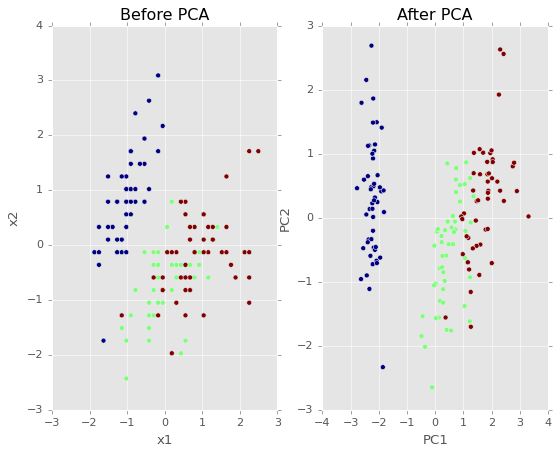

In [67]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Aquí se muestra la explicación de la varianza para las dos componentes obtenidas de la proyección de las cuatro características del conjunto de datos

In [68]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [71]:
# Covariance of the principal components
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [75]:
# Covariance of the original dataset
np.cov(X.T)

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

Importancia de cada característica sobre cada una de las componentes

In [76]:
# PCA components
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [77]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

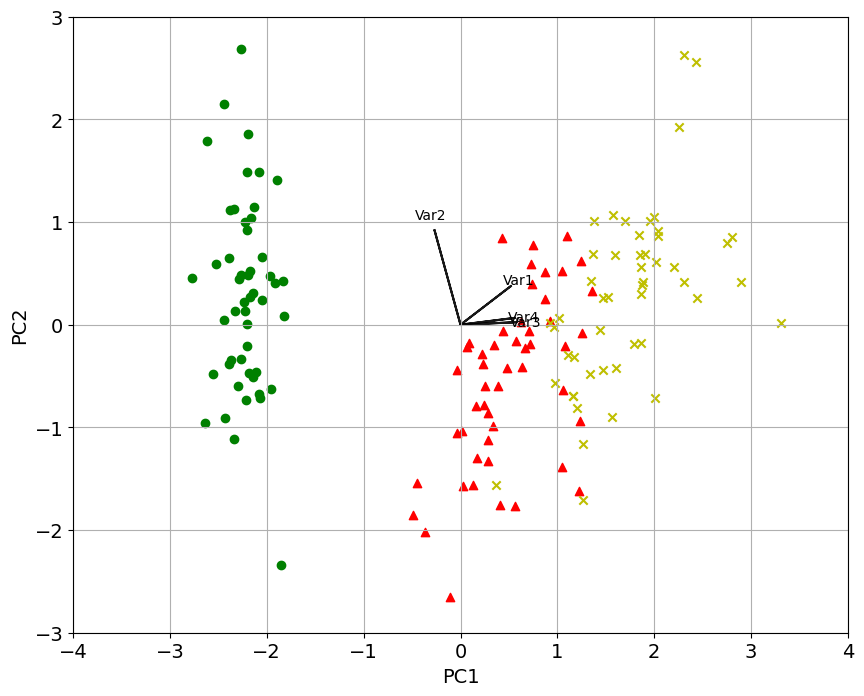

In [78]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

* Como se pudo verificar, la primer componente logra explicar aprox el 73% de la varianza, sumando las dos componente se tienen un total de explicación de 0.96. Así que dos componente son suficientes para explicar la varianza de las 4 características del conjunto de datos original
* Se observa que la característica más importante para la primer componente es la número 3. Sin embargo la número 1 y 4 tienen un valor similar y por esto se destacan como las tres más importante. Caso contrario, la componente 2 posee una importancia mucho mayor (aprox 0.92) en la segunda característica.
* En el gráfico se observa que la orientación de proyecciones para reducir la dimensionalidad y hacía donde se proyectan los componentes para cada una de las característica. Para este caso sencillo se hace fácil la observación.

## Preguntas a responder

**¿Qué es feature importance y para que nos sirve?**

La importancia de característica nos muestra la contribución que ha tenido cada una de las características ya sea sobre los componente en una reducción de dimensionalidad o el aporte sobre una predicción específica en el caso de hablar de temas de explicabilidad. `Feature importance` es un paso importante porque nos permite tener claridad de los aportes y poder tomar decisiones sobre características específicas a la hora de seleccionar aquellas que pueden ser de mayor valor sobre la experimentación (entrenamiento) o cuando se predice, identificar cual puede afectar más algún cambio en la respuesta esperada.

**¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**

Se observa que la importancia de cada característica en las componente varía de manera significativa. Y esto suele suceder para cada iteración en específico cuando se hace reducción de dimensionalidad, básicamente para la `PC1` se muestra que las características 1, 3 y 4 aportan mucho más a la componente, casi todas con un aporte similar. Sin embargo, para el caso de la `PC2` se observa que la característica más importante es la 2. Mostrando las variaciones que podemos tener de importancia sobre cada iteración.

**¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**

La importancia no solo se puede aplicar en temas de reducción de dimensionalidad, adicionalmente puede ser aplicada para la selección de característica que nos den más valor a la hora de realizar una experimentación o entrenamiento y adicionalmente, cuando queremos evaluar los aportes sobre predicciones en temas de explicabilidad. Adicionalmente, aplicar reducción de dimensionalidad es importante cuando se tiene conjunto de datos con gran número de características donde posiblemente exista una correlación entre ella y puedan explicarse con menos componentes. 

Adicionalmente, la reducción de dimensionalidad en imágenes nos muestra la importancia que puede tener a la hora de entrenar por ejemplo redes neuronales, donde podemos con imágenes con ruido tener un bueno resultados y usar estos pesos para nuevas predicciones